<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Dungeon_Third_Solution_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.6 MB/s eta 0:00:00


In [2]:
!pip install ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00
time: 402 µs (started: 2025-04-08 08:30:12 +00:00)


In [11]:
!pip install pylatexenc

time: 6.37 s (started: 2025-04-08 08:31:35 +00:00)


In [40]:
import math
import networkx as nx
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Import Qiskit
from qiskit import  QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from qiskit.circuit.library import QFT
from qiskit.circuit.library import MCMT, YGate, RYGate, MCXGate

time: 1.19 ms (started: 2025-04-08 08:35:58 +00:00)


## State preparation from cell 0

In [13]:
# Creates a 3x3 grid
G = nx.grid_2d_graph(3, 3)
mapping = {(i, j): i * 3 + j for i in range(3) for j in range(3)}
G = nx.relabel_nodes(G, mapping)

edges = list(G.edges())
undirected_edges = edges + [(v, u) for u, v in edges]

print(undirected_edges)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 6), (3, 4), (4, 7), (4, 5), (5, 8), (6, 7), (7, 8), (3, 0), (1, 0), (4, 1), (2, 1), (5, 2), (6, 3), (4, 3), (7, 4), (5, 4), (8, 5), (7, 6), (8, 7)]
time: 1.75 ms (started: 2025-04-08 08:31:46 +00:00)


In [15]:
qc = QuantumCircuit(9, 9)
qc.x(0)

visited = [0]

while True:
  frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

  if len(frontier) == 0:
    break

  for node in frontier:
    incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

    if len(incoming) == 1:
      qc.cry(np.pi/2, incoming[0], node)

    if len(incoming) > 1:
      combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

      for combination in combinations:
        gate = RYGate(np.pi/2).control(2, ctrl_state=combination)
        qc.append(gate, [incoming[0], incoming[1], node])

  visited.extend(frontier)


qc.draw()

┌───┐                                                                  »
q_0: ┤ X ├─────■──────────■─────────────────────────────────────────────────»
     └───┘┌────┴────┐     │                                                 »
q_1: ─────┤ Ry(π/2) ├─────┼──────────■──────────■──────────o──────────■─────»
          └─────────┘     │     ┌────┴────┐     │          │          │     »
q_2: ─────────────────────┼─────┤ Ry(π/2) ├─────┼──────────┼──────────┼─────»
                     ┌────┴────┐└─────────┘     │          │          │     »
q_3: ────────────────┤ Ry(π/2) ├────────────────o──────────■──────────■─────»
                     └─────────┘           ┌────┴────┐┌────┴────┐┌────┴────┐»
q_4: ──────────────────────────────────────┤ Ry(π/2) ├┤ Ry(π/2) ├┤ Ry(π/2) ├»
                                           └─────────┘└─────────┘└─────────┘»
q_5: ───────────────────────────────────────────────────────────────────────»
                                                                            »
q_6: ───────────────────────────────────────────────────────────────────────»
                                                                            »
q_7: ───────────────────────────────────────────────────────────────────────»
                                                                            »
q_8: ───────────────────────────────────────────────────────────────────────»
                                                                            »
c: 9/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_2: ────────────────■──────────o──────────■───────────────────────────»
«                     │          │          │                           »
«q_3: ─────■──────────┼──────────┼──────────┼───────────────────────────»
«          │          │          │          │                           »
«q_4: ─────┼──────────o──────────■──────────■──────────■──────────o─────»
«          │     ┌────┴────┐┌────┴────┐┌────┴────┐     │          │     »
«q_5: ─────┼─────┤ Ry(π/2) ├┤ Ry(π/2) ├┤ Ry(π/2) ├─────┼──────────┼─────»
«     ┌────┴────┐└─────────┘└─────────┘└─────────┘     │          │     »
«q_6: ┤ Ry(π/2) ├──────────────────────────────────────o──────────■─────»
«     └─────────┘                                 ┌────┴────┐┌────┴────┐»
«q_7: ────────────────────────────────────────────┤ Ry(π/2) ├┤ Ry(π/2) ├»
«                                                 └─────────┘└─────────┘»
«q_8: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«c: 9/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                                 
«q_0: ────────────────────────────────────────────
«                                                 
«q_1: ────────────────────────────────────────────
«                                                 
«q_2: ────────────────────────────────────────────
«                                                 
«q_3: ────────────────────────────────────────────
«                                                 
«q_4: ─────■──────────────────────────────────────
«          │                                      
«q_5: ─────┼──────────■──────────o──────────■─────
«          │          │          │          │     
«q_6: ─────■──────────┼──────────┼──────────┼─────
«     ┌────┴────┐     │          │          │     
«q_7: ┤ Ry(π/2) ├─────o──────────■──────────■───

time: 45.9 ms (started: 2025-04-08 08:32:04 +00:00)


In [16]:
qc.measure(range(9), range(9))

time: 3.17 ms (started: 2025-04-08 08:32:07 +00:00)


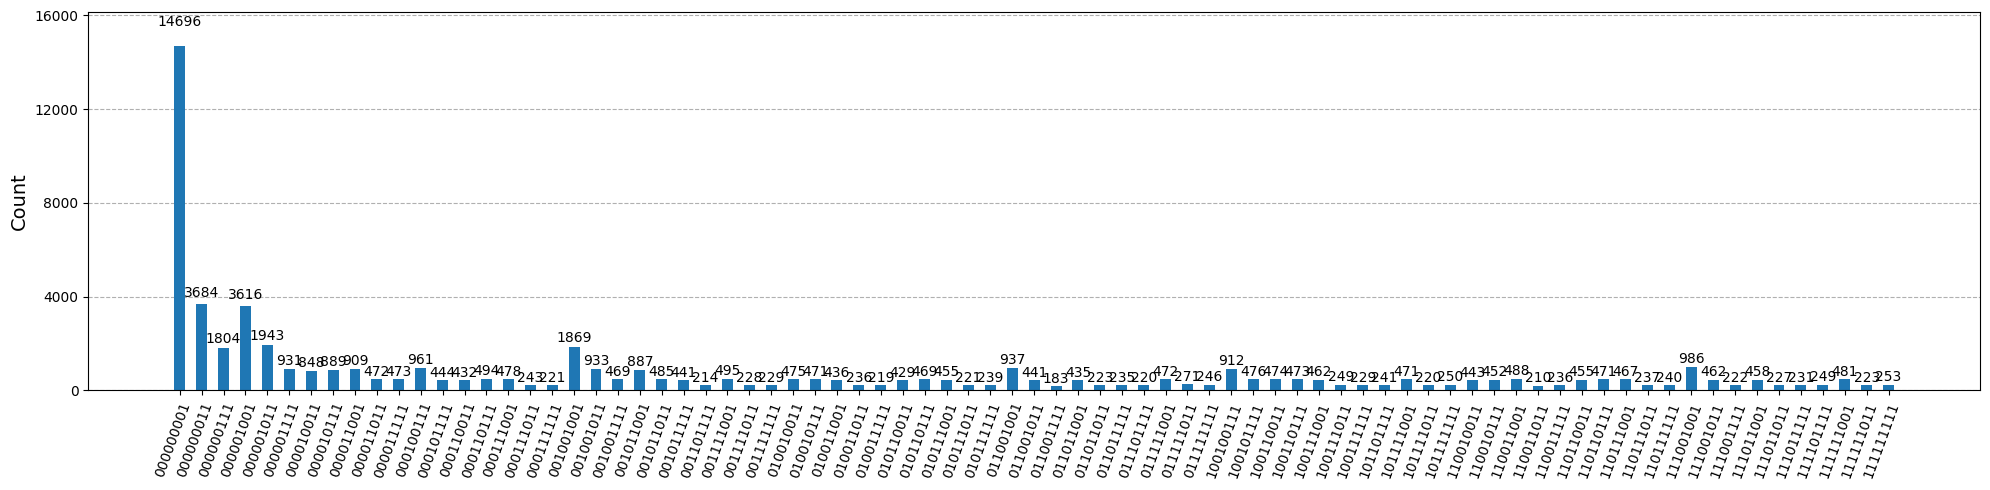

time: 1.42 s (started: 2025-04-08 08:32:24 +00:00)


In [17]:
qasm_sim = AerSimulator()
transpiled = transpile(qc, qasm_sim)
job = qasm_sim.run(transpiled, shots=9**5)
result = job.result()
counts = result.get_counts()
plot_histogram(counts, figsize=(20,5))

In [18]:
values = [val for val in counts.values()]
np.std(values)

np.float64(1692.0876162899283)

time: 2.66 ms (started: 2025-04-08 08:32:30 +00:00)


## Genetic algorithm

In [19]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.3 MB/s eta 0:00:00
time: 3.02 s (started: 2025-04-08 08:32:38 +00:00)


In [ ]:
import pygad

time: 37.6 ms (started: 2024-04-12 07:14:09 +00:00)


In [20]:
"""
Debug function
"""
def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print(solution)

time: 761 µs (started: 2025-04-08 08:32:52 +00:00)


In [39]:
"""
Circuit creation
"""
def create_circuit(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9, 9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

"""
Evaluate circuit
"""
def evaluate(qc):
  qc.measure(range(9), range(9))
  qasm_sim = AerSimulator()
  transpiled = transpile(qc, qasm_sim)
  job = qasm_sim.run(transpiled, shots=9**5)
  result = job.result()
  counts = result.get_counts()
  return counts

"""
Fitness Function
"""
def fitness_func(ga_instance, solution, solution_idx):
  qc = create_circuit(solution, 0)
  counts = evaluate(qc)
  values = [val for val in counts.values()]

  fitness_high_priority = len(values)

  return fitness_high_priority + 1 / np.std(values)

time: 6.36 ms (started: 2025-04-08 08:35:47 +00:00)


In [ ]:
num_variables = 16

variable_range = np.linspace(0, np.pi, dtype='float')

ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=4,
                       sol_per_pop=100,
                       num_genes=num_variables,
                       gene_type=np.float64,
                       gene_space=variable_range,
                       on_generation=on_gen,
                       fitness_func=fitness_func)

ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution

In [28]:
# Already calculated solution
solution = [2.30810889, 2.17988062, 1.66696753, 2.17988062, 2.17988062,
       1.98753821, 1.73108167, 1.7951958 , 1.7951958 , 1.73108167,
       1.66696753, 1.98753821, 1.66696753, 1.60285339, 1.53873926,
       1.60285339]

time: 676 µs (started: 2025-04-08 08:34:03 +00:00)


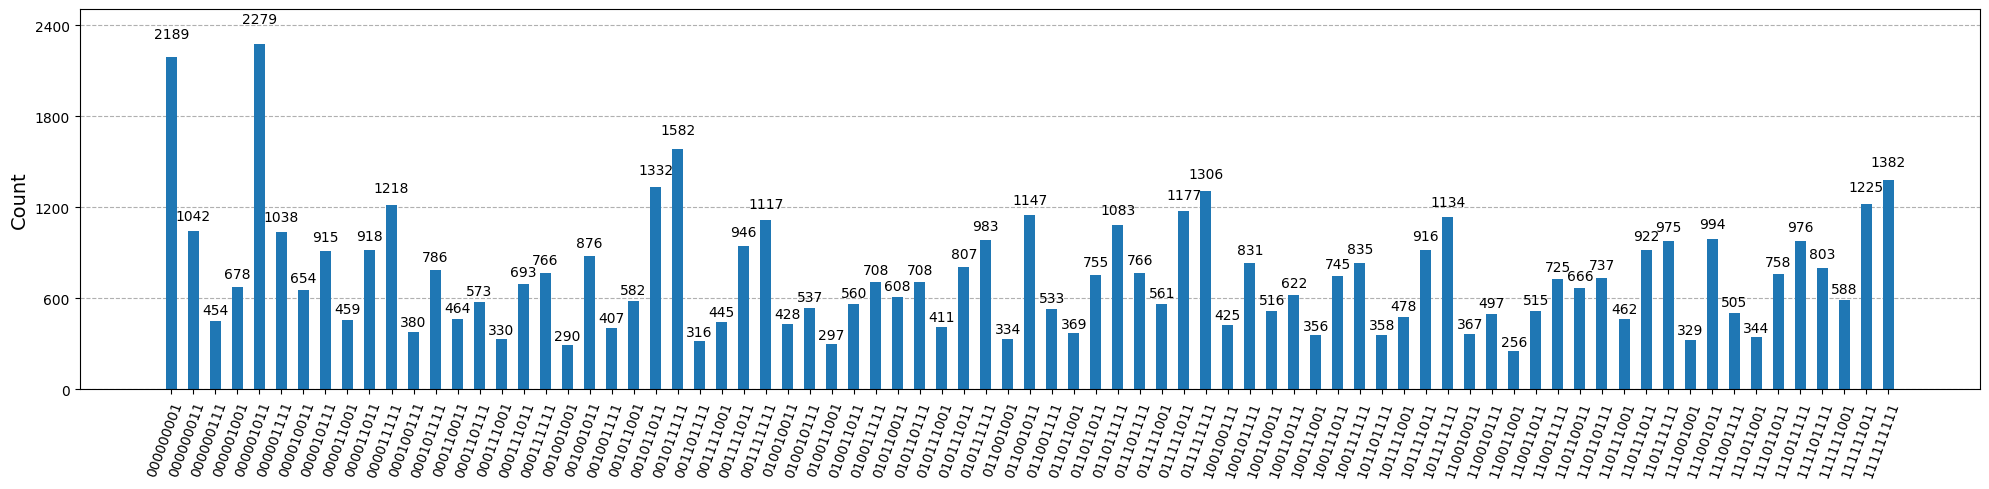

time: 1.04 s (started: 2025-04-08 08:34:04 +00:00)


In [29]:
qc = create_circuit(solution, 0)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [30]:
values = [val for val in counts.values()]
np.std(values)

np.float64(384.37085854410583)

time: 2.85 ms (started: 2025-04-08 08:34:09 +00:00)


## W-state example

In [34]:
q = QuantumRegister(3, "q")

qc = QuantumCircuit(q)

# Initialization to |100>
qc.x(q[2])
qc.barrier()

# First F -> |100> + |110>
theta = np.arccos(np.sqrt(1/(3 - 1 + 1)))
qc.ry(-theta, q[1])
qc.cz(q[2], q[1])
qc.ry(theta, q[1])
qc.barrier()

# Second F -> |100> + |110> + |111>
theta = np.arccos(np.sqrt(1/(3 - 2 + 1)))
qc.ry(-theta, q[0])
qc.cz(q[1], q[0])
qc.ry(theta, q[0])
qc.barrier()

# CNOTs -> |100> + |010> + |001>
qc.cx(q[1], q[2])
qc.cx(q[0], q[1])

qc.draw()

░                                    ░ ┌──────────┐   ┌─────────┐ ░ »
q_0: ──────░────────────────────────────────────░─┤ Ry(-π/4) ├─■─┤ Ry(π/4) ├─░─»
           ░ ┌──────────────┐   ┌─────────────┐ ░ └──────────┘ │ └─────────┘ ░ »
q_1: ──────░─┤ Ry(-0.95532) ├─■─┤ Ry(0.95532) ├─░──────────────■─────────────░─»
     ┌───┐ ░ └──────────────┘ │ └─────────────┘ ░                            ░ »
q_2: ┤ X ├─░──────────────────■─────────────────░────────────────────────────░─»
     └───┘ ░                                    ░                            ░ »
«               
«q_0: ───────■──
«          ┌─┴─┐
«q_1: ──■──┤ X ├
«     ┌─┴─┐└───┘
«q_2: ┤ X ├─────
«     └───┘

time: 14.2 ms (started: 2025-04-08 08:35:01 +00:00)


## Execution

In [53]:
def create_circuit_no_meas(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

time: 1.36 ms (started: 2025-04-08 08:37:28 +00:00)


In [37]:
# Creating the state_prep and inverse to be used in Grover
solution = [2.30810889, 2.17988062, 1.66696753, 2.17988062, 2.17988062,
       1.98753821, 1.73108167, 1.7951958 , 1.7951958 , 1.73108167,
       1.66696753, 1.98753821, 1.66696753, 1.60285339, 1.53873926,
       1.60285339]
qc = create_circuit_no_meas(solution, 0)
stat_prep = qc.to_instruction()
inv_stat_prep = qc.inverse().to_instruction()

qc.draw()

┌───┐                                                                     »
q_0: ┤ X ├──────■─────────────■────────────────────────────────────────────────»
     └───┘┌─────┴──────┐      │                                                »
q_1: ─────┤ Ry(2.3081) ├──────┼─────────────■────────────■─────────────o───────»
          └────────────┘      │       ┌─────┴─────┐      │             │       »
q_2: ─────────────────────────┼───────┤ Ry(1.667) ├──────┼─────────────┼───────»
                        ┌─────┴──────┐└───────────┘      │             │       »
q_3: ───────────────────┤ Ry(2.1799) ├───────────────────o─────────────■───────»
                        └────────────┘             ┌─────┴──────┐┌─────┴──────┐»
q_4: ──────────────────────────────────────────────┤ Ry(2.1799) ├┤ Ry(2.1799) ├»
                                                   └────────────┘└────────────┘»
q_5: ──────────────────────────────────────────────────────────────────────────»
                                                                               »
q_6: ──────────────────────────────────────────────────────────────────────────»
                                                                               »
q_7: ──────────────────────────────────────────────────────────────────────────»
                                                                               »
q_8: ──────────────────────────────────────────────────────────────────────────»
                                                                               »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────■───────────────────────────────────────────────────────────────»
«           │                                                               »
«q_2: ──────┼───────────────────────────■─────────────o─────────────■───────»
«           │                           │             │             │       »
«q_3: ──────■─────────────■─────────────┼─────────────┼─────────────┼───────»
«     ┌─────┴──────┐      │             │             │             │       »
«q_4: ┤ Ry(1.9875) ├──────┼─────────────o─────────────■─────────────■───────»
«     └────────────┘      │       ┌─────┴──────┐┌─────┴──────┐┌─────┴──────┐»
«q_5: ────────────────────┼───────┤ Ry(1.7952) ├┤ Ry(1.7952) ├┤ Ry(1.7311) ├»
«                   ┌─────┴──────┐└────────────┘└────────────┘└────────────┘»
«q_6: ──────────────┤ Ry(1.7311) ├──────────────────────────────────────────»
«                   └────────────┘                                          »
«q_7: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_8: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«                                                                         »
«q_0: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_1: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_2: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_3: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_4: ──────■────────────o─────────────■──────────────────────────────────»
«           │            │             │                                  »
«q_5: ──────┼────────────┼─────────────┼────────────■─────────────o───────»
«           │            │             │            │             │     

time: 51.7 ms (started: 2025-04-08 08:35:14 +00:00)


In [38]:
def cnz(qc, num_control, node, anc):
  qc.ccx(node[0], node[1], anc[0])
  for i in range(num_control - 2):
      qc.ccx(node[i + 2], anc[i], anc[i + 1])
  qc.cz(anc[num_control - 2], node[num_control])
  for i in range(num_control - 2)[::-1]:
      qc.ccx(node[i + 2], anc[i], anc[i + 1])
  qc.ccx(node[0], node[1], anc[0])

time: 732 µs (started: 2025-04-08 08:35:17 +00:00)


In [67]:
# Registers
graph = QuantumRegister(9, 'graph')
oracle = QuantumRegister(1, 'oracle')
anc = QuantumRegister(7, 'anc_diff')
c = ClassicalRegister(9, 'c')

qc = QuantumCircuit(graph, oracle, anc, c)

qc.barrier(label="State preparation")
qc.append(stat_prep, graph)

qc.barrier(label="Oracle preparation")
qc.x(oracle)
qc.h(oracle)

num_iterations = 1

for i in range(num_iterations):

  qc.barrier(label="Oracle")
  qc.ccx(graph[0], graph[1], anc[0])
  qc.barrier()

  # Now I want to count how many rooms there are in the 3 count qubits
  qc.h([anc[2], anc[3], anc[4]])
  qc.barrier()
  for qubit in graph:
    qc.crz(np.pi/4, qubit, anc[2])
    qc.crz(np.pi/2, qubit, anc[3])
    qc.crz(np.pi, qubit, anc[4])
    qc.barrier()

  qft = QFT(3, do_swaps=True, inverse=True)
  qc.append(qft.to_instruction(), [anc[2], anc[3], anc[4]])

  # And check if the rooms are 4 = '100'
  mcx = MCXGate(3, "count", "100")

  qc.append(mcx, qargs=[anc[2], anc[3], anc[4], anc[1]])

  qc.barrier()

  # I now attach the constraint ancillas to the oracle register
  qc.ccx(anc[0], anc[1], oracle[0])

  qc.barrier()

  qc.append(mcx, qargs=[anc[2], anc[3], anc[4], anc[1]])

  qc.append(qft.inverse().to_instruction(), [anc[2], anc[3], anc[4]])

  # Then I reset the oracle
  for qubit in graph:
    qc.crz(-np.pi, qubit, anc[4])
    qc.crz(-np.pi/2, qubit, anc[3])
    qc.crz(-np.pi/4, qubit, anc[2])
    qc.barrier()

  qc.h([anc[2], anc[3], anc[4]])
  qc.barrier()

  qc.ccx(graph[0], graph[1], anc[0])

  qc.barrier(label="Diffusion")

  # inv state preparation + x
  qc.append(inv_stat_prep, graph)
  qc.x(range(9))

  qc.barrier()

  # Multi-controlled Z
  cnz(qc, 8, graph[::-1], anc)

  qc.barrier()

  # x + state preparation
  qc.x(range(9))
  qc.append(stat_prep, graph)

# Measurement
qc.measure(graph, c)

#qc.draw("mpl")
print(dict(qc.decompose(reps=10).count_ops()))


{'u': 970, 'cx': 569, 'barrier': 29, 'measure': 9}
time: 888 ms (started: 2025-04-08 08:45:01 +00:00)


In [47]:
# Transpiling the circuit for the target simulator
quantum_simulator = AerSimulator()
transpiled = transpile(qc, quantum_simulator)

job = quantum_simulator.run(transpiled, shots=9**4)
result = job.result()
counts = result.get_counts()

time: 909 ms (started: 2025-04-08 08:36:47 +00:00)


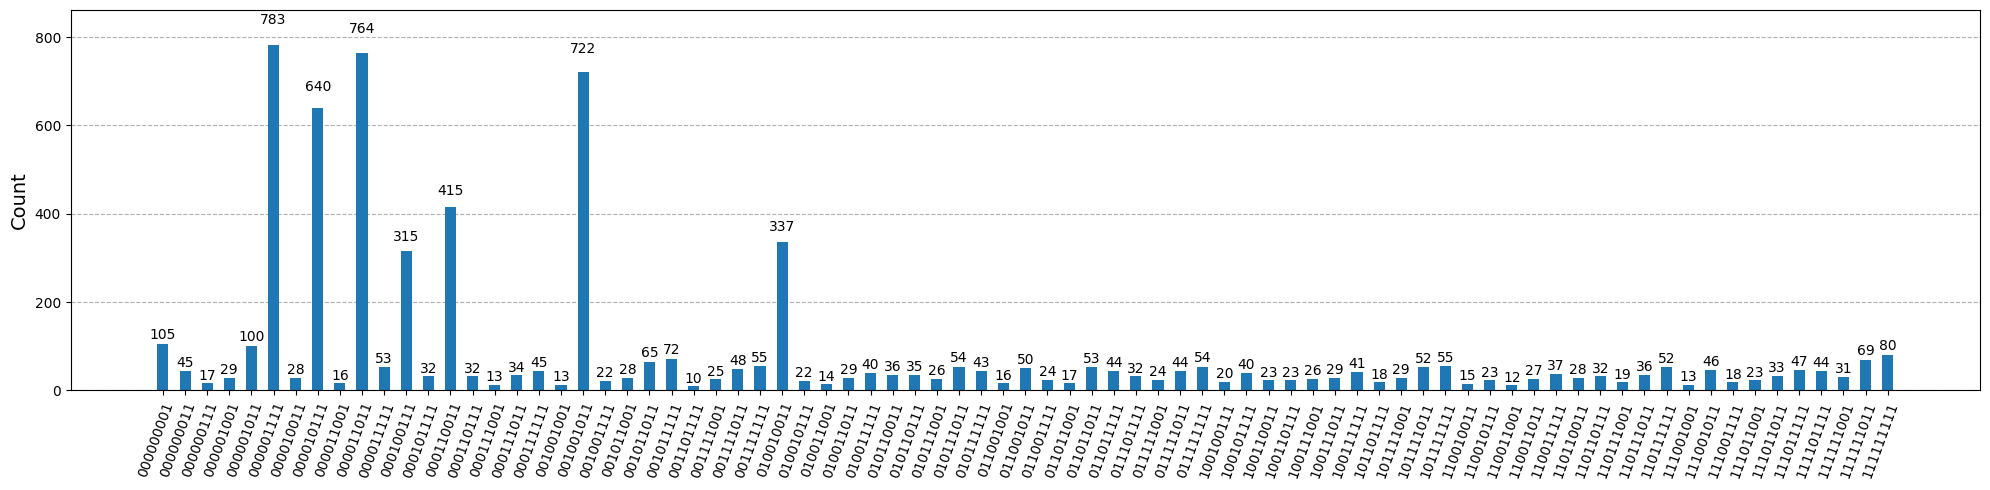

time: 3.19 s (started: 2025-04-08 08:36:49 +00:00)


In [48]:
plot_histogram(counts, figsize=(20, 5))

## GA Starting from vertex 1

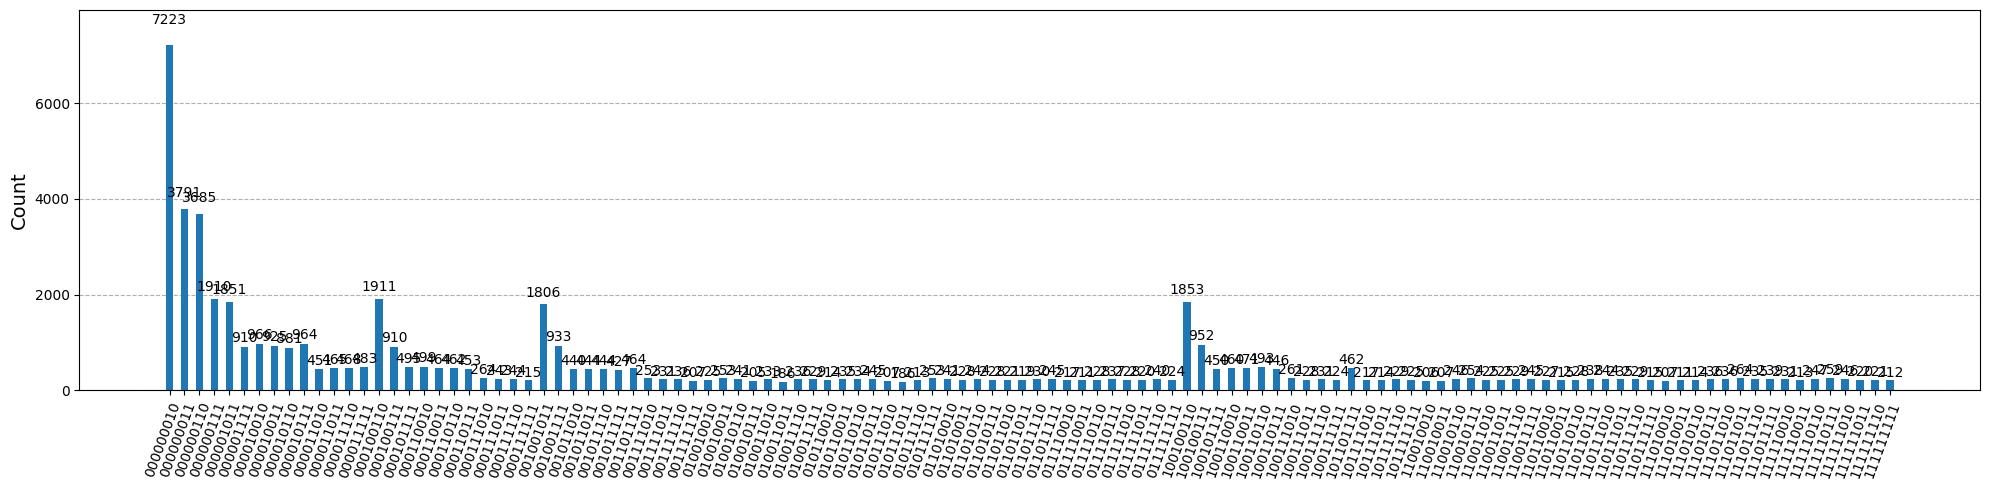

time: 2.23 s (started: 2025-04-08 08:36:57 +00:00)


In [49]:
solution = np.full(
  shape=16,
  fill_value=np.pi/2,
  dtype=np.float64
)
qc = create_circuit(solution, 1)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [50]:
values = [val for val in counts.values()]
np.std(values)

np.float64(845.440136262859)

time: 2.7 ms (started: 2025-04-08 08:37:03 +00:00)


In [51]:
"""
Circuit creation
"""
def create_circuit(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9, 9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

"""
Evaluate circuit
"""
def evaluate(qc):
  qc.measure(range(9), range(9))
  qasm_sim = AerSimulator()
  transpiled = transpile(qc, qasm_sim)
  job = qasm_sim.run(transpiled, shots=9**5)
  result = job.result()
  counts = result.get_counts()
  return counts

"""
Fitness Function
"""
def fitness_func(ga_instance, solution, solution_idx):
  qc = create_circuit(solution, 1)
  counts = evaluate(qc)
  values = [val for val in counts.values()]

  fitness_high_priority = len(values)

  return fitness_high_priority + 1 / np.std(values)

time: 2.15 ms (started: 2025-04-08 08:37:09 +00:00)


In [52]:
num_variables = 16

variable_range = np.linspace(0, np.pi, dtype='float')

ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=4,
                       sol_per_pop=100,
                       num_genes=num_variables,
                       gene_type=np.float64,
                       gene_space=variable_range,
                       on_generation=on_gen,
                       fitness_func=fitness_func)

ga_instance.run()

NameError: name 'pygad' is not defined

time: 9.56 ms (started: 2025-04-08 08:37:11 +00:00)


In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution

In [55]:
solution = [1.60285339, 1.53873926, 2.5004513,  1.53873926, 1.92342407, 1.73108167,
 2.30810889, 1.66696753, 1.66696753, 1.92342407, 1.47462512, 1.66696753,
 1.53873926, 1.60285339, 1.60285339, 1.66696753]
qc = create_circuit_no_meas(solution, 1)
qc.draw()

┌────────────┐                                          »
q_0: ─────┤ Ry(1.6029) ├──────────────────────────────────o───────»
     ┌───┐└─────┬──────┘                                  │       »
q_1: ┤ X ├──────■─────────────■─────────────■─────────────┼───────»
     └───┘              ┌─────┴──────┐      │             │       »
q_2: ───────────────────┤ Ry(1.5387) ├──────┼─────────────┼───────»
                        └────────────┘      │       ┌─────┴──────┐»
q_3: ───────────────────────────────────────┼───────┤ Ry(1.5387) ├»
                                      ┌─────┴──────┐└─────┬──────┘»
q_4: ─────────────────────────────────┤ Ry(2.5005) ├──────■───────»
                                      └────────────┘              »
q_5: ─────────────────────────────────────────────────────────────»
                                                                  »
q_6: ─────────────────────────────────────────────────────────────»
                                                                  »
q_7: ─────────────────────────────────────────────────────────────»
                                                                  »
q_8: ─────────────────────────────────────────────────────────────»
                                                                  »
«                                                                         »
«q_0: ──────■─────────────■───────────────────────────────────────────────»
«           │             │                                               »
«q_1: ──────┼─────────────┼───────────────────────────────────────────────»
«           │             │                                               »
«q_2: ──────┼─────────────┼─────────────■─────────────o────────────■──────»
«     ┌─────┴──────┐┌─────┴──────┐      │             │            │      »
«q_3: ┤ Ry(1.9234) ├┤ Ry(1.7311) ├──────┼─────────────┼────────────┼──────»
«     └─────┬──────┘└─────┬──────┘      │             │            │      »
«q_4: ──────o─────────────■─────────────o─────────────■────────────■──────»
«                                 ┌─────┴──────┐┌─────┴─────┐┌─────┴─────┐»
«q_5: ────────────────────────────┤ Ry(2.3081) ├┤ Ry(1.667) ├┤ Ry(1.667) ├»
«                                 └────────────┘└───────────┘└───────────┘»
«q_6: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_7: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_8: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«                                                                          »
«q_0: ─────────────────────────────────────────────────────────────────────»
«                                                                          »
«q_1: ─────────────────────────────────────────────────────────────────────»
«                                                                          »
«q_2: ─────────────────────────────────────────────────────────────────────»
«                                                                          »
«q_3: ─────────────────────────────────────────────────────────────o───────»
«                                                                  │       »
«q_4: ──────■──────────────────────────────────────────────────────┼───────»
«           │                                                      │       »
«q_5: ──────┼─────────────■─────────────o────────────■─────────────┼───────»
«           │             │             │            │       ┌─────┴──────┐»
«q_6: ──────┼─────────────┼─────────────┼────────────┼───────┤ Ry(1.6029) ├»
«     ┌─────┴──────┐      │             │            │       └─────┬──────┘»
«q_7: ┤ Ry(1.9234) ├──────o─────────────■────────────■─────────────■───────»
«     └────────────┘┌─────┴──────┐┌─────┴─

time: 62.5 ms (started: 2025-04-08 08:37:39 +00:00)


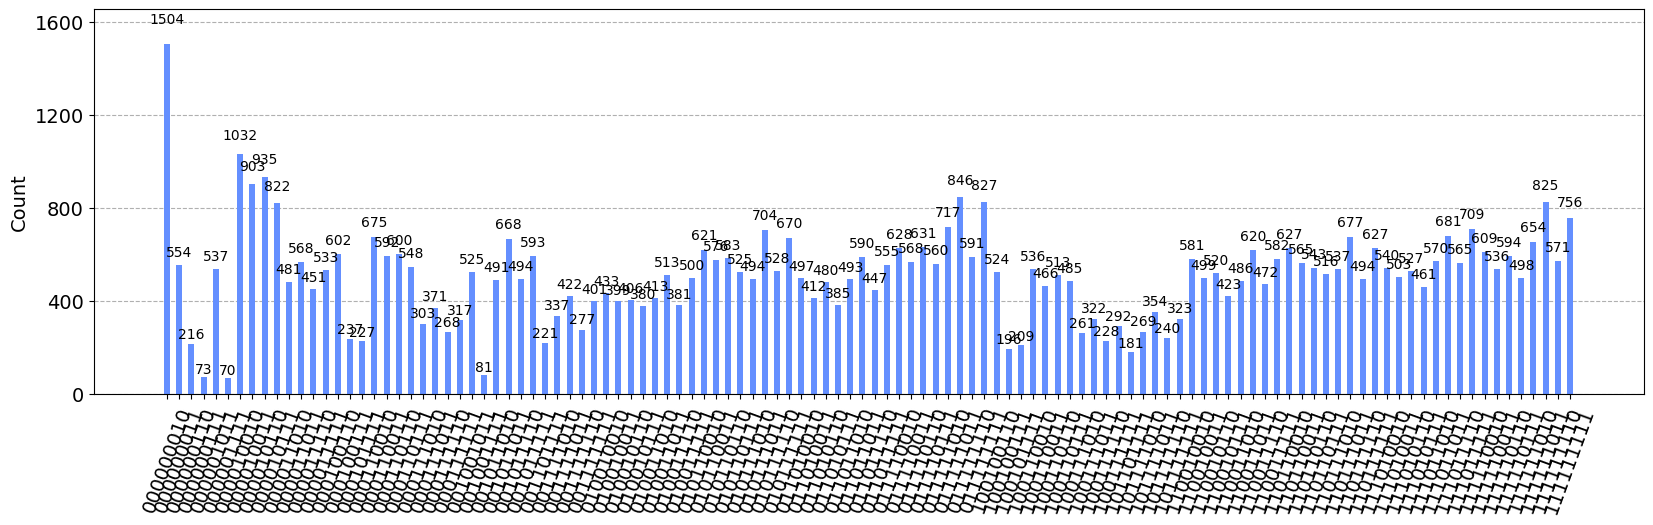

time: 2.81 s (started: 2024-04-12 07:53:39 +00:00)


In [ ]:
qc = create_circuit(solution, 1)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [56]:
values = [val for val in counts.values()]
np.std(values)

np.float64(845.440136262859)

time: 2.99 ms (started: 2025-04-08 08:37:45 +00:00)


## GA Starting from vertex 4

In [58]:
solution = np.full(
  shape=16,
  fill_value=np.pi/2,
  dtype=np.float64
)
qc = create_circuit(solution, 4)
qc.draw()

┌─────────┐┌─────────┐┌─────────┐           »
q_0: ───────────────────────────┤ Ry(π/2) ├┤ Ry(π/2) ├┤ Ry(π/2) ├───────────»
          ┌─────────┐           └────┬────┘└────┬────┘└────┬────┘           »
q_1: ─────┤ Ry(π/2) ├────────────────o──────────■──────────■────────────────»
          └────┬────┘                │          │          │                »
q_2: ──────────┼─────────────────────┼──────────┼──────────┼────────────────»
               │     ┌─────────┐     │          │          │                »
q_3: ──────────┼─────┤ Ry(π/2) ├─────■──────────o──────────■────────────────»
     ┌───┐     │     └────┬────┘                                            »
q_4: ┤ X ├─────■──────────■──────────■──────────■───────────────────────────»
     └───┘                      ┌────┴────┐     │                           »
q_5: ───────────────────────────┤ Ry(π/2) ├─────┼──────────■──────────o─────»
                                └─────────┘     │          │          │     »
q_6: ───────────────────────────────────────────┼──────────┼──────────┼─────»
                                           ┌────┴────┐     │          │     »
q_7: ──────────────────────────────────────┤ Ry(π/2) ├─────o──────────■─────»
                                           └─────────┘┌────┴────┐┌────┴────┐»
q_8: ─────────────────────────────────────────────────┤ Ry(π/2) ├┤ Ry(π/2) ├»
                                                      └─────────┘└─────────┘»
c: 9/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ────────────────o─────────────────────■─────────────────────■─────»
«                ┌────┴────┐           ┌────┴────┐           ┌────┴────┐»
«q_2: ───────────┤ Ry(π/2) ├───────────┤ Ry(π/2) ├───────────┤ Ry(π/2) ├»
«                └────┬────┘           └────┬────┘           └────┬────┘»
«q_3: ────────────────┼──────────o──────────┼──────────■──────────┼─────»
«                     │          │          │          │          │     »
«q_4: ────────────────┼──────────┼──────────┼──────────┼──────────┼─────»
«                     │          │          │          │          │     »
«q_5: ─────■──────────■──────────┼──────────o──────────┼──────────■─────»
«          │                ┌────┴────┐           ┌────┴────┐           »
«q_6: ─────┼────────────────┤ Ry(π/2) ├───────────┤ Ry(π/2) ├───────────»
«          │                └────┬────┘           └────┬────┘           »
«q_7: ─────■─────────────────────■─────────────────────o────────────────»
«     ┌────┴────┐                                                       »
«q_8: ┤ Ry(π/2) ├───────────────────────────────────────────────────────»
«     └─────────┘                                                       »
«c: 9/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                
«q_0: ───────────
«                
«q_1: ───────────
«                
«q_2: ───────────
«                
«q_3: ─────■─────
«          │     
«q_4: ─────┼─────
«          │     
«q_5: ─────┼─────
«     ┌────┴────┐
«q_6: ┤ Ry(π/2) ├
«     └────┬────┘
«q_7: ─────■─────
«                
«q_8: ───────────
«                
«c: 9/═══════════
«

time: 95.4 ms (started: 2025-04-08 08:37:52 +00:00)


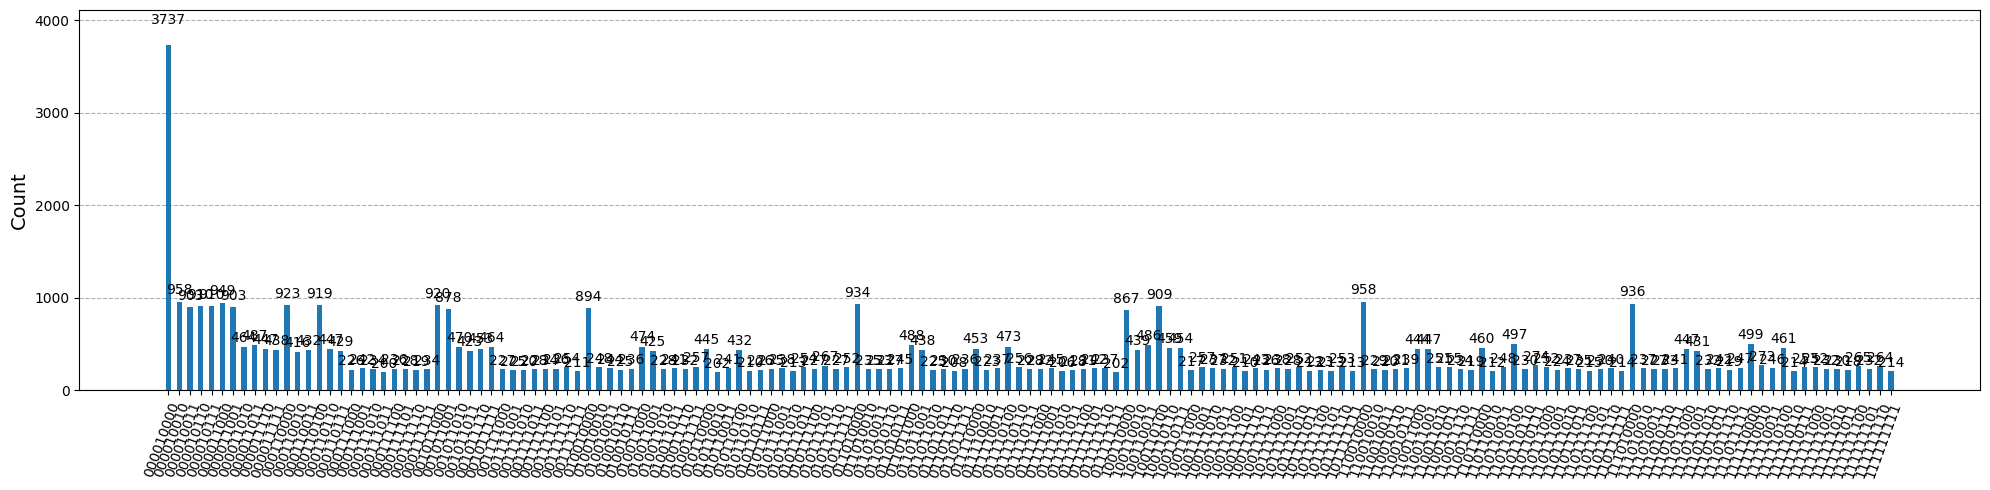

time: 1.82 s (started: 2025-04-08 08:37:56 +00:00)


In [59]:
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [60]:
values = [val for val in counts.values()]
np.std(values)

np.float64(338.91836565460267)

time: 2.89 ms (started: 2025-04-08 08:38:00 +00:00)


In [61]:
"""
Circuit creation
"""
def create_circuit(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9, 9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

"""
Evaluate circuit
"""
def evaluate(qc):
  qc.measure(range(9), range(9))
  qasm_sim = AerSimulator()
  transpiled = transpile(qc, qasm_sim)
  job = qasm_sim.run(transpiled, shots=9**5)
  result = job.result()
  counts = result.get_counts()
  return counts

"""
Fitness Function
"""
def fitness_func(ga_instance, solution, solution_idx):
  qc = create_circuit(solution, 4)
  counts = evaluate(qc)
  values = [val for val in counts.values()]

  fitness_high_priority = len(values)

  return fitness_high_priority + 1 / np.std(values)

time: 3.09 ms (started: 2025-04-08 08:38:10 +00:00)


In [ ]:
num_variables = 16

variable_range = np.linspace(0, np.pi, dtype='float')

ga_instance = pygad.GA(num_generations=25,
                       num_parents_mating=4,
                       sol_per_pop=100,
                       num_genes=num_variables,
                       gene_type=np.float64,
                       gene_space=variable_range,
                       on_generation=on_gen,
                       fitness_func=fitness_func)

ga_instance.run()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation :  1
Fitness of the best solution : 160.00123124675864
[2.56456543 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 0.64114136 1.47462512 1.53873926 2.5004513
 2.56456543 2.37222302 1.02582617 0.57702722]
Generation :  2
Fitness of the best solution : 161.00137896184177
[1.73108167 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 0.64114136 1.47462512 1.53873926 2.5004513
 2.56456543 2.37222302 1.02582617 0.57702722]
Generation :  3
Fitness of the best solution : 161.0019924148722
[1.73108167 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 1.7951958  1.47462512 1.53873926 2.5004513
 2.56456543 2.37222302 1.02582617 1.02582617]
Generation :  4
Fitness of the best solution : 161.00228437914487
[1.73108167 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 1.7951958  1.47462512 1.53873926 1.47462512
 2.56456543 2.37222302 1.02582617 1.02582617]
Generation :  5
Fitn

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution

array([1.7951958 , 1.7951958 , 1.7951958 , 1.85930994, 1.53873926,
       1.41051099, 1.66696753, 1.60285339, 1.66696753, 1.66696753,
       1.53873926, 1.60285339, 1.47462512, 1.66696753, 1.60285339,
       1.60285339])

time: 50.3 s (started: 2024-04-12 09:34:19 +00:00)


In [62]:
solution = [1.7951958 , 1.7951958 , 1.7951958 , 1.85930994, 1.53873926,
       1.41051099, 1.66696753, 1.60285339, 1.66696753, 1.66696753,
       1.53873926, 1.60285339, 1.47462512, 1.66696753, 1.60285339,
       1.60285339]
qc = create_circuit_no_meas(solution, 4)
qc.draw()

┌────────────┐┌───────────┐ »
q_0: ─────────────────────────────────┤ Ry(1.6029) ├┤ Ry(1.667) ├─»
          ┌────────────┐              └─────┬──────┘└─────┬─────┘ »
q_1: ─────┤ Ry(1.7952) ├────────────────────o─────────────■───────»
          └─────┬──────┘                    │             │       »
q_2: ───────────┼───────────────────────────┼─────────────┼───────»
                │       ┌────────────┐      │             │       »
q_3: ───────────┼───────┤ Ry(1.7952) ├──────■─────────────o───────»
     ┌───┐      │       └─────┬──────┘                            »
q_4: ┤ X ├──────■─────────────■─────────────■─────────────■───────»
     └───┘                            ┌─────┴──────┐      │       »
q_5: ─────────────────────────────────┤ Ry(1.7952) ├──────┼───────»
                                      └────────────┘      │       »
q_6: ─────────────────────────────────────────────────────┼───────»
                                                    ┌─────┴──────┐»
q_7: ───────────────────────────────────────────────┤ Ry(1.8593) ├»
                                                    └────────────┘»
q_8: ─────────────────────────────────────────────────────────────»
                                                                  »
«     ┌───────────┐                                                       »
«q_0: ┤ Ry(1.667) ├───────────────────────────────────────────────────────»
«     └─────┬─────┘                                                       »
«q_1: ──────■────────────────────────────────────────o────────────────────»
«           │                                  ┌─────┴──────┐             »
«q_2: ──────┼──────────────────────────────────┤ Ry(1.5387) ├─────────────»
«           │                                  └─────┬──────┘             »
«q_3: ──────■────────────────────────────────────────┼─────────────o──────»
«                                                    │             │      »
«q_4: ───────────────────────────────────────────────┼─────────────┼──────»
«                                                    │             │      »
«q_5: ──────■─────────────o─────────────■────────────■─────────────┼──────»
«           │             │             │                    ┌─────┴─────┐»
«q_6: ──────┼─────────────┼─────────────┼────────────────────┤ Ry(1.667) ├»
«           │             │             │                    └─────┬─────┘»
«q_7: ──────o─────────────■─────────────■──────────────────────────■──────»
«     ┌─────┴──────┐┌─────┴──────┐┌─────┴─────┐                           »
«q_8: ┤ Ry(1.5387) ├┤ Ry(1.4105) ├┤ Ry(1.667) ├───────────────────────────»
«     └────────────┘└────────────┘└───────────┘                           »
«                                                             
«q_0: ────────────────────────────────────────────────────────
«                                                             
«q_1: ──────■───────────────────────────■─────────────────────
«     ┌─────┴──────┐              ┌─────┴──────┐              
«q_2: ┤ Ry(1.6029) ├──────────────┤ Ry(1.4746) ├──────────────
«     └─────┬──────┘              └─────┬──────┘              
«q_3: ──────┼─────────────■─────────────┼─────────────■───────
«           │             │             │             │       
«q_4: ──────┼─────────────┼─────────────┼─────────────┼───────
«           │             │             │             │       
«q_5: ──────o─────────────┼─────────────■─────────────┼───────
«                   ┌─────┴──────┐              ┌─────┴──────┐
«q_6: ──────────────┤ Ry(1.6029) ├──────────────┤ Ry(1.6029) ├
«                   └─────┬──────┘              └─────┬──────┘
«q_7: ────────────────────o───────────────────────────■───────
«                                                             
«q_8: ────────────────────────────────────────────────────────
«

time: 37 ms (started: 2025-04-08 08:38:21 +00:00)


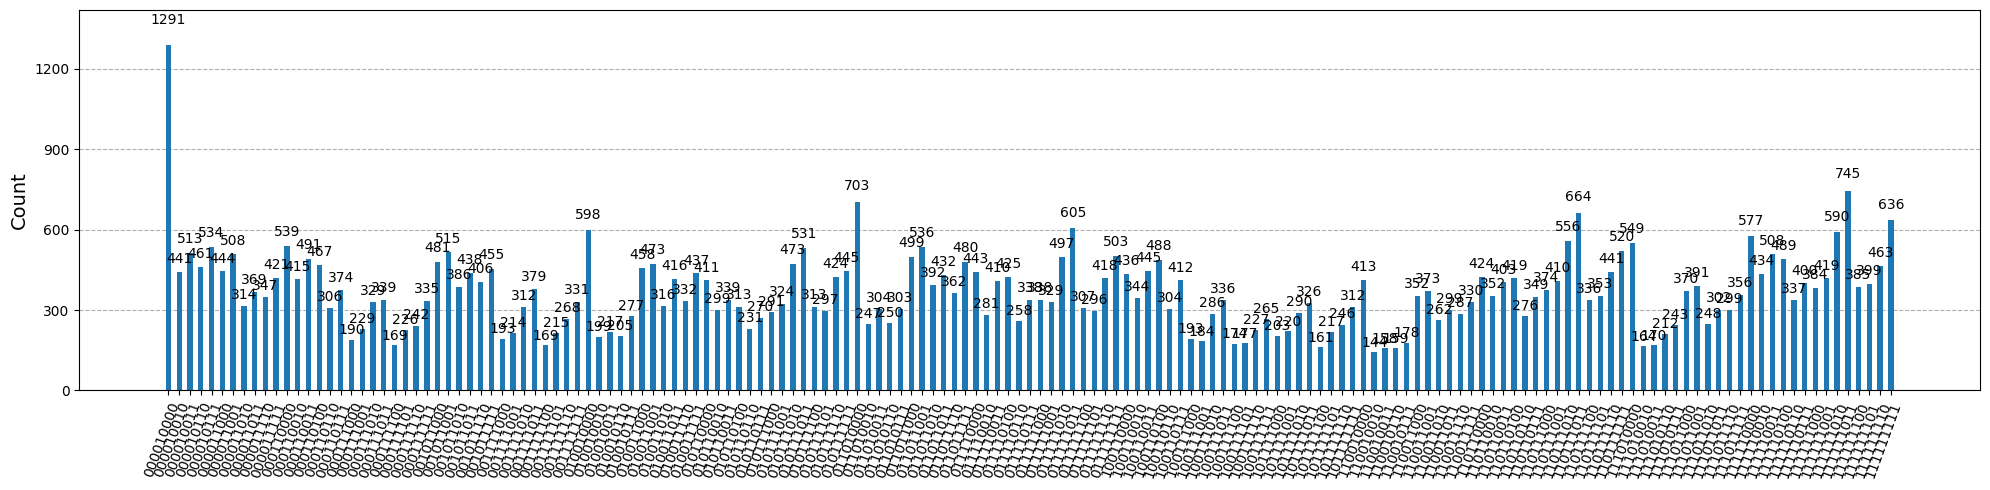

time: 3.36 s (started: 2025-04-08 08:38:24 +00:00)


In [63]:
qc = create_circuit(solution, 4)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [64]:
values = [val for val in counts.values()]
np.std(values)

np.float64(140.83938764475104)

time: 2.86 ms (started: 2025-04-08 08:38:28 +00:00)
